In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import os
from sklearn import metrics 
from scipy.stats import zscore
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\PREM\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data=pd.read_csv("BlackFriday.csv")

In [3]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

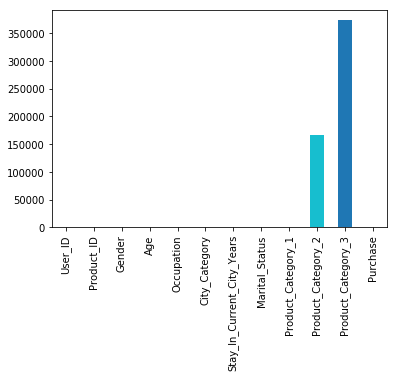

In [6]:
data.isna().sum().plot.bar()

Text(0,0.5,'Count')

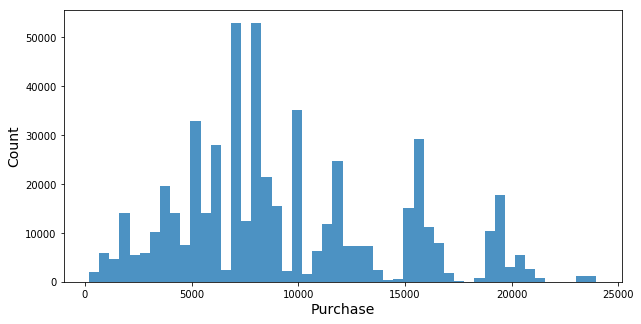

In [9]:
plt.figure(figsize=(10,5))
plt.hist(data['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)

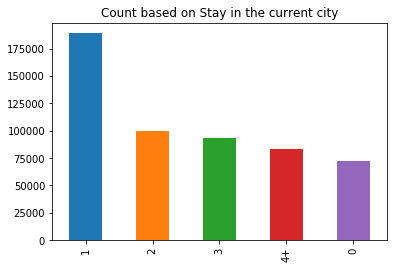

In [10]:
data['Stay_In_Current_City_Years'].value_counts().plot( title="Count based on Stay in the current city", kind='bar')

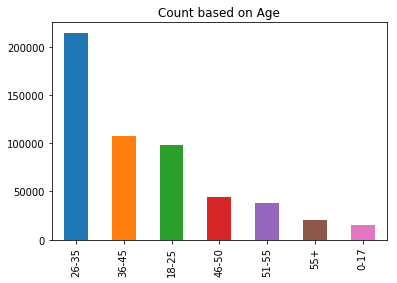

In [11]:
data['Age'].value_counts().plot( title="Count based on Age", kind='bar')

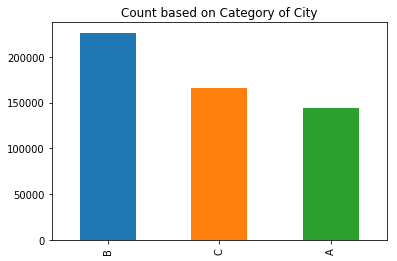

In [12]:
data['City_Category'].value_counts().plot( title="Count based on Category of City", kind='bar')

In [13]:
data['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

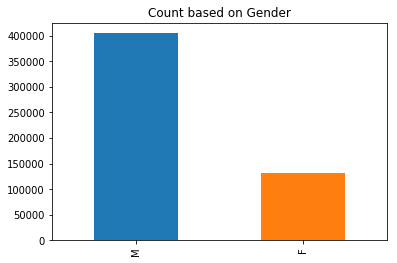

In [14]:
data["Gender"].value_counts().plot( title="Count based on Gender", kind='bar')

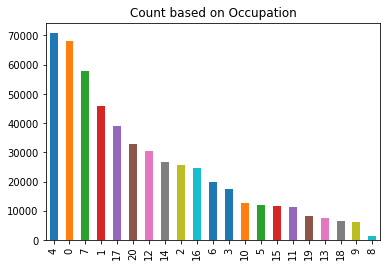

In [15]:
data["Occupation"].value_counts().plot( title="Count based on Occupation", kind='bar')

In [16]:
data['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

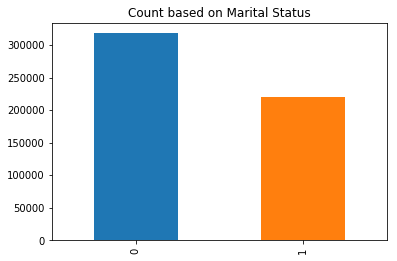

In [17]:
data['Marital_Status'].value_counts().plot( title="Count based on Marital Status", kind='bar')

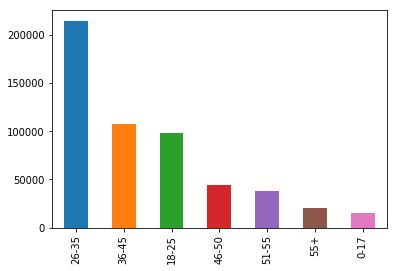

In [18]:
data['Age'].value_counts().plot.bar()

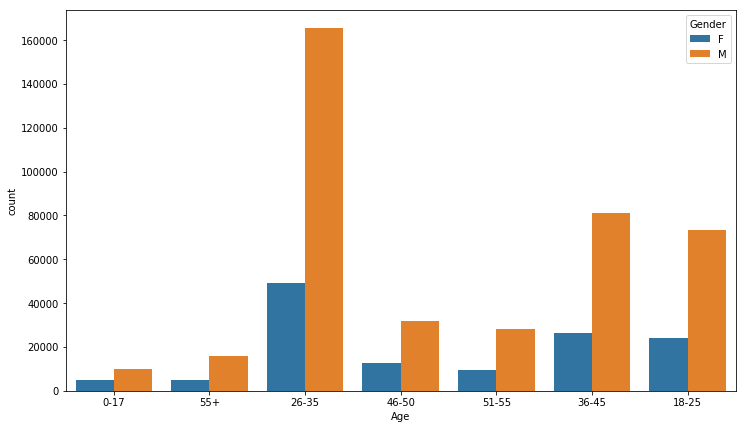

In [19]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['Age'],hue=data['Gender'])

In [20]:
data['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

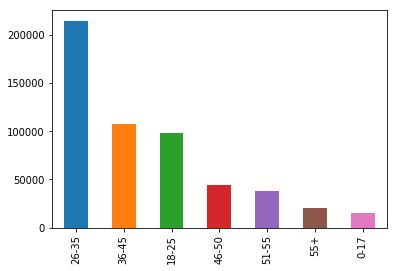

In [21]:
data['Age'].value_counts().plot.bar()

In [22]:
data['City_Category'].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

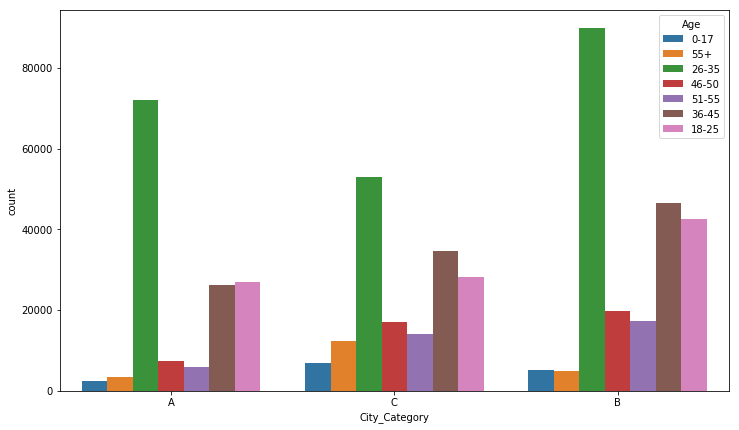

In [23]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['City_Category'],hue=data['Age'])

In [24]:
data['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [25]:
data['Stay_In_Current_City_Years'].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

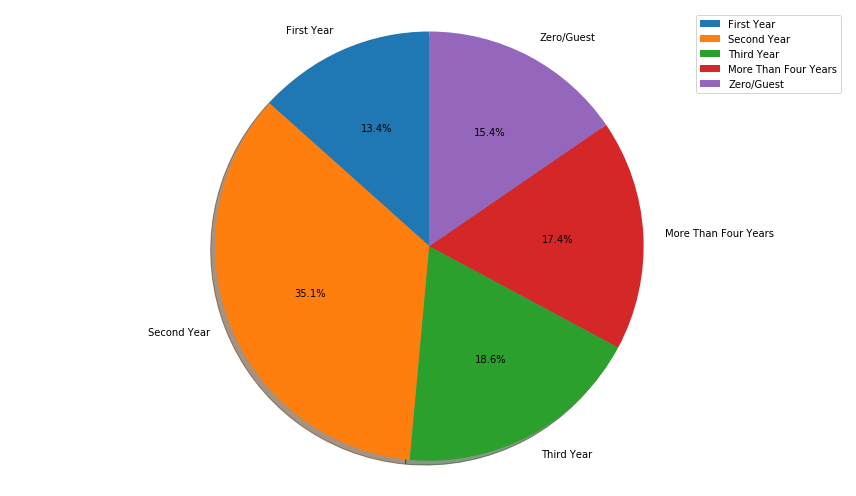

In [26]:
labels=['First Year','Second Year','Third Year','More Than Four Years','Zero/Guest']
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data.groupby('Stay_In_Current_City_Years')['Purchase'].sum(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [27]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [28]:
data.fillna(0, inplace=True)

In [29]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data['User_ID'] = lb_make.fit_transform(data['User_ID'])
data['Product_ID'] = lb_make.fit_transform(data['Product_ID'])
data['Gender'] = lb_make.fit_transform(data['Gender'])
data['Age']=lb_make.fit_transform(data['Age'])
data['Stay_In_Current_City_Years']=lb_make.fit_transform(data['Stay_In_Current_City_Years'])
data['City_Category'] = lb_make.fit_transform(data['City_Category'])

In [31]:
X=np.asarray(data[['User_ID', 'Product_ID','Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
predictions
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,predictions)))

Test set RMSE: 25731316.365


In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 1.230e+05
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:58:09   Log-Likelihood:            -4.0114e+06
No. Observations:              403182   AIC:                         8.023e+06
Df Residuals:                  403171   BIC:                         8.023e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4823      0.004    108.910      0.000       0.474       0.491
x2             0.5376      0.007     72.537      0.000       0.523       0.552
x3          2248.6711     17.472    128.700      0.000    2214.426    2282.916
x4           533.2612      6.071     87.842      0.000     521.363     545.160
x5            62.6033      1.219     51.344      0.000      60.214      64.993
x6           953.9165     10.325     92.387      0.000     933.679     974.154
x7           496.1565      5.899     84.104      0.000     484.594     507.719
x8           228.3322     17.047     13.394      0.000     194.920     261.744
x9           -90.3409      2.143    -42.158      0.000     -94.541     -86.141
x10           84.9765      1.256     67.640      0.000      82.514      87.439
x11          241.4129      1.348    179.050      0.000     238.770     244.056
==============================================================================
Omnibus:                    13482.888   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14879.696
Skew:                           0.462   Prob(JB):                         0.00
Kurtosis:                       3.182   Cond. No.                     8.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X=np.asarray(data[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
X_train[1]

array([1., 1., 1., 2., 2., 1., 3., 4., 5.])

In [36]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
predictions
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,predictions)))

Test set RMSE: 26986687.830


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 1.411e+05
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:58:46   Log-Likelihood:            -4.0211e+06
No. Observations:              403182   AIC:                         8.042e+06
Df Residuals:                  403173   BIC:                         8.042e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2810.3923     17.372    161.776      0.000    2776.343    2844.441
x2           716.8492      6.073    118.048      0.000     704.947     728.751
x3            79.0894      1.243     63.648      0.000      76.654      81.525
x4          1200.6427     10.425    115.172      0.000    1180.210    1221.075
x5           636.9528      5.949    107.066      0.000     625.293     648.613
x6           343.2033     17.445     19.673      0.000     309.011     377.396
x7           -16.7442      2.129     -7.864      0.000     -20.917     -12.571
x8           103.9950      1.279     81.301      0.000     101.488     106.502
x9           258.6027      1.371    188.569      0.000     255.915     261.291
==============================================================================
Omnibus:                     9041.691   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9660.140
Skew:                           0.376   Prob(JB):                         0.00
Kurtosis:                       3.095   Cond. No.                         30.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X=np.asarray(data[['User_ID', 'Product_ID','Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor(max_depth=11)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [40]:
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_1)))
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_2)))

Test set RMSE: 8056265.941
Test set RMSE: 7934321.792


In [41]:
X=np.asarray(data[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor(max_depth=11)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [43]:
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_1)))
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_2)))

Test set RMSE: 8885590.156
Test set RMSE: 8870391.228


In [63]:
X=np.asarray(data[['User_ID', 'Product_ID','Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
regr = RandomForestRegressor(max_depth=12, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

C:\Users\PREM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
print(regr.feature_importances_)

[9.43843142e-03 6.28204867e-02 1.30632519e-03 3.69001107e-03
 4.18781692e-03 3.67983997e-03 1.98552429e-03 7.21619327e-04
 8.88771967e-01 1.25520996e-02 1.08458782e-02]


In [66]:
y_1=regr.predict(X_test)

In [67]:
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_1)))

Test set RMSE: 7635218.020


In [68]:
X=np.asarray(data[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
regr = RandomForestRegressor(max_depth=12, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

C:\Users\PREM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [70]:
print(regr.feature_importances_)

[0.00179116 0.00558942 0.00739251 0.00581445 0.00422337 0.00147515
 0.9445006  0.01775752 0.01145582]


In [71]:
y_1=regr.predict(X_test)
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_1)))

Test set RMSE: 8677330.898


In [44]:
data["Age"].value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

In [45]:
Age_data=data[data["Age"]==2]

In [46]:
len(Age_data)
Age_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [47]:
X=np.asarray(Age_data[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(Age_data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
predictions
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,predictions)))

Test set RMSE: 21619301.481


In [52]:
X=np.asarray(Age_data[['User_ID', 'Product_ID','Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(Age_data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
predictions
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,predictions)))

Test set RMSE: 21533833.553


In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 1.230e+05
Date:                Sat, 15 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:24:40   Log-Likelihood:            -4.0114e+06
No. Observations:              403182   AIC:                         8.023e+06
Df Residuals:                  403171   BIC:                         8.023e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4823      0.004    108.910      0.000       0.474       0.491
x2             0.5376      0.007     72.537      0.000       0.523       0.552
x3          2248.6711     17.472    128.700      0.000    2214.426    2282.916
x4           533.2612      6.071     87.842      0.000     521.363     545.160
x5            62.6033      1.219     51.344      0.000      60.214      64.993
x6           953.9165     10.325     92.387      0.000     933.679     974.154
x7           496.1565      5.899     84.104      0.000     484.594     507.719
x8           228.3322     17.047     13.394      0.000     194.920     261.744
x9           -90.3409      2.143    -42.158      0.000     -94.541     -86.141
x10           84.9765      1.256     67.640      0.000      82.514      87.439
x11          241.4129      1.348    179.050      0.000     238.770     244.056
==============================================================================
Omnibus:                    13482.888   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14879.696
Skew:                           0.462   Prob(JB):                         0.00
Kurtosis:                       3.182   Cond. No.                     8.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X=np.asarray(Age_data[['User_ID', 'Product_ID','Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(Age_data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor(max_depth=11)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [59]:
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_1)))
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_2)))

Test set RMSE: 8319298.480
Test set RMSE: 8318541.705


In [60]:
X=np.asarray(Age_data[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]);
y=np.asarray(Age_data[['Purchase']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor(max_depth=11)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [62]:
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_1)))
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_2)))

Test set RMSE: 9191738.517
Test set RMSE: 9240023.839
